<a href="https://colab.research.google.com/github/yRavi21/Sentiment-analysis/blob/main/YouTube_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import googleapiclient.discovery
from googleapiclient.discovery import build

In [ ]:
dev = "Developer Key"

In [ ]:
import pandas as pd
import googleapiclient.discovery
developer_key = dev

def get_comments(video_id, youtube):
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=100  # Adjust the maxResults per page as needed
    )

    comments = []

    while True:
        response = request.execute()

        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            public = item['snippet']['isPublic']
            comments.append({
                'author': comment['authorDisplayName'],
                'published_at': comment['publishedAt'],
                'like_count': comment['likeCount'],
                'text': comment['textOriginal'],
                'video_id': video_id,
                'public': public
            })

        if 'nextPageToken' in response:
            next_page_token = response['nextPageToken']
            request = youtube.commentThreads().list(
                part="snippet",
                videoId=video_id,
                maxResults=100,
                pageToken=next_page_token
            )
        else:
            break

    return comments

def retrieve_all_comments(video_ids, developer_key):
    youtube = googleapiclient.discovery.build("youtube", "v3", developerKey=developer_key)
    all_comments = []

    for video_id in video_ids:
        video_comments = get_comments(video_id, youtube)
        all_comments.extend(video_comments)

    df_comments = pd.DataFrame(all_comments)
    return df_comments


In [ ]:
video_ids = ['hn7gY7NXTFA', 'erLbbextvlY', 'YykjpeuMNEk', 'MFbePoexzmg']
entertainment = retrieve_all_comments(video_ids, developer_key)
entertainment

,author,published_at,like_count,text,video_id,public
0,@leolitecollege7111,2024-06-02T05:41:24Z,0,Give Kakashi the 9 tails and this show ends on...,hn7gY7NXTFA,True
1,@Gamesterr-,2024-06-01T19:23:36Z,0,Folks had armament haki,hn7gY7NXTFA,True
2,@thunderdealer_555,2024-06-01T17:02:05Z,0,is it just me or did something change with the...,hn7gY7NXTFA,True
3,@salahabdelmajid4199,2024-06-01T13:31:24Z,0,Best fight,hn7gY7NXTFA,True
4,@latamondal3024,2024-06-01T09:53:35Z,0,Kakashi no1❤❤❤,hn7gY7NXTFA,True
...,...,...,...,...,...,...
423235,@guptagamingyt6358,2020-08-19T04:17:21Z,17,😂😂😂😂 I watched full steam,MFbePoexzmg,True
423236,@sumantha2079,2020-08-19T04:17:21Z,2,I got glacier from one classic crate,MFbePoexzmg,True
423237,@ketan8409,2020-08-19T04:17:12Z,0,😍😍😍,MFbePoexzmg,True
423238,@TitanOP11,2020-08-19T04:17:07Z,1,Scout darling kaise ho😃😃😃,MFbePoexzmg,True


In [ ]:
video_ids = ['wofz0k6FCMU', 'btWIF0LignA', 'WQdqgrWvy6g', 'OFbyNU6UQQs', 'wtJPe1ksS6E']
sports = retrieve_all_comments(video_ids, developer_key)
sports

,author,published_at,like_count,text,video_id,public
0,@code2compass,2024-06-02T09:15:44Z,0,He drink so much water,wofz0k6FCMU,True
1,@hatemsh405,2024-05-28T19:31:56Z,0,The man who struggled to reach the first chair...,wofz0k6FCMU,True
2,@marouanebr409,2024-05-26T00:08:42Z,0,"I thought the suit guy retreated at first, dam...",wofz0k6FCMU,True
3,@mextor3340,2024-05-25T17:38:11Z,0,What happened?,wofz0k6FCMU,True
4,@Tech_with_heart-yt,2024-05-25T13:44:22Z,0,73 million views😂,wofz0k6FCMU,True
...,...,...,...,...,...,...
41845,@punitsinghania,2019-02-20T12:03:05Z,0,For you manpreet,wtJPe1ksS6E,True
41846,@yavutaroliftzs_7155,2019-02-20T12:02:26Z,0,Hi,wtJPe1ksS6E,True
41847,@unaypogi1806,2019-02-20T12:02:21Z,0,3nd,wtJPe1ksS6E,True
41848,@mariosiles2455,2019-02-20T12:02:20Z,0,3rd,wtJPe1ksS6E,True


In [ ]:
video_ids = ['xDDNdmEljRg', 'lfm33o25WCQ', '9qRxNYuR2c4', 'ATlila3e9dM', '6RX-39Mn-w8','3_rYgBHk73c']
news = retrieve_all_comments(video_ids, developer_key)
news

,author,published_at,like_count,text,video_id,public
0,@vladimirputin9611,2024-06-02T13:59:18Z,0,"From Pakistan but love the way he replied, \nB...",xDDNdmEljRg,True
1,@ArgonDavid,2024-06-02T13:55:31Z,0,Europe cries like child on everything. 🙏,xDDNdmEljRg,True
2,@user-gi1dc5de2t,2024-06-02T13:27:54Z,0,So what.,xDDNdmEljRg,True
3,@ThakurKunalSingh-wg5kp,2024-06-02T13:15:30Z,0,Gone are your days to talk down to Hindus. Thi...,xDDNdmEljRg,True
4,@Bennix,2024-06-02T13:11:49Z,0,"As Indonesian, I support Mr. Jaishankar as the...",xDDNdmEljRg,True
...,...,...,...,...,...,...
59386,@AlexLizardi-ye2nn,2024-05-28T02:32:21Z,1,😇😇😇,3_rYgBHk73c,True
59387,@AlexLizardi-ye2nn,2024-05-28T02:31:54Z,0,😇😇😇😇,3_rYgBHk73c,True
59388,@dianahill5116,2024-05-28T02:31:54Z,9,Trump has No Scruples.,3_rYgBHk73c,True
59389,@RonPhillips420,2024-05-28T02:31:43Z,20,I demand to know where Lester is,3_rYgBHk73c,True


In [ ]:
entertainment=entertainment.drop(['like_count','public','author','published_at'],axis=1)
sports=sports.drop(['like_count','public','author','published_at'],axis=1)
news=news.drop(['like_count','public','author','published_at'],axis=1)

In [ ]:
entertainment.head(5)

,text,video_id
0,Give Kakashi the 9 tails and this show ends on...,hn7gY7NXTFA
1,Folks had armament haki,hn7gY7NXTFA
2,is it just me or did something change with the...,hn7gY7NXTFA
3,Best fight,hn7gY7NXTFA
4,Kakashi no1❤❤❤,hn7gY7NXTFA


In [ ]:
from google.colab import files
entertainment.to_csv('df_entertainment.csv')
files.download('df_entertainment.csv')
sports.to_csv('df_sports.csv')
files.download('df_sports.csv')
news.to_csv('df_politics.csv')
files.download('df_politics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
comments_df['video_id'].value_counts()

video_id
6RX-39Mn-w8    3726
EYbw8GLnspw     714
FyEXt0fyoT0     417
S_Ef7qeGr0M     350
d7QfkJcb4ak     232
Name: count, dtype: int64

In [ ]:
video_ids = ['E6kBtvOrEME','5ZoBzUQCjq4','zZ3ddKglpY8','DwpF-zWi0Kw','rW_fwcmyIfk']
comments_df2 = retrieve_all_comments(video_ids, developer_key)

In [ ]:
comments_df2

,author,published_at,like_count,text,video_id,public
0,@Firstpost,2023-10-07T14:28:00Z,116,Do you think caste reservation should be ended...,E6kBtvOrEME,True
1,@Seevawonderloaf,2024-04-27T09:24:55Z,0,1:43 Palki your work is great but this is what...,E6kBtvOrEME,True
2,@Seevawonderloaf,2024-04-27T09:23:44Z,0,The ruling party doesn’t want the census becau...,E6kBtvOrEME,True
3,@heenachoudhary,2024-04-26T16:33:30Z,0,Would like to have the transcript of this vide...,E6kBtvOrEME,True
4,@RnjyNishad,2024-04-25T01:12:55Z,0,Sabse jyada Reservation Brahman ke pass hai.\n...,E6kBtvOrEME,True
...,...,...,...,...,...,...
29617,@s.zeditz5373,2021-08-07T15:17:11Z,0,India india 🇮🇳🇮🇳🇮🇳,rW_fwcmyIfk,True
29618,@sumitsehrawat7587,2021-08-07T15:17:11Z,2,Jai ho india. \nJai ho neeraj baisaab. \nMonu ...,rW_fwcmyIfk,True
29619,@directionerforever4677,2021-08-07T15:17:09Z,1,First,rW_fwcmyIfk,True
29620,@kollishyammkisshore6558,2021-08-07T15:17:09Z,2,1 st view,rW_fwcmyIfk,True


In [ ]:
comments_df2['video_id'].value_counts()

video_id
rW_fwcmyIfk    23180
5ZoBzUQCjq4     2776
zZ3ddKglpY8     2542
DwpF-zWi0Kw      725
E6kBtvOrEME      399
Name: count, dtype: int64

In [ ]:
from google.colab import files
comments_df.to_csv('df.csv')
files.download('df.csv')
comments_df2.to_csv('df2.csv')
files.download('df2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the datasets
df_entertainment = pd.read_csv("df_entertainment.csv")
df_sports = pd.read_csv("df_sports.csv")
df_politics = pd.read_csv("df_politics.csv")

In [ ]:
df_sports

,Unnamed: 0,text,video_id
0,0,He drink so much water,wofz0k6FCMU
1,1,The man who struggled to reach the first chair...,wofz0k6FCMU
2,2,"I thought the suit guy retreated at first, dam...",wofz0k6FCMU
3,3,What happened?,wofz0k6FCMU
4,4,73 million views😂,wofz0k6FCMU
...,...,...,...
41845,41845,For you manpreet,wtJPe1ksS6E
41846,41846,Hi,wtJPe1ksS6E
41847,41847,3nd,wtJPe1ksS6E
41848,41848,3rd,wtJPe1ksS6E


In [ ]:
from google.colab import files
import pandas as pd

# Load the datasets
df_entertainment = pd.read_csv("df_entertainment.csv")
df_sports = pd.read_csv("df_sports.csv")
df_politics = pd.read_csv("df_politics.csv")

df1 = df_entertainment.tail(30000)
df2 = df_entertainment.head(20000)
df_entertainment = pd.concat([df1, df2])
df_entertainment.reset_index(drop=True, inplace=True)
df_entertainment=df_entertainment.drop(['Unnamed: 0'],axis =1)
df_politics=df_politics.drop(['Unnamed: 0'],axis =1)
df_sports=df_sports.drop(['Unnamed: 0'],axis =1)


In [ ]:
# Add a new column for labels
df_entertainment['topic'] = 'entertainment'
df_sports['topic'] = 'sports'
df_politics['topic'] = 'politics'

# Combine the datasets
df_combined = pd.concat([df_entertainment, df_sports, df_politics], ignore_index=True)

# Shuffle the combined dataset to mix the topics
df_combined = df_combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the combined dataset to a new CSV file (optional)
df_combined.to_csv("df.csv", index=False)

# Display the first few rows of the combined dataset
df_combined.head()


,text,video_id,topic
0,Best moment ma ki chut mil gyi mil giy 😂😂😂😂,MFbePoexzmg,entertainment
1,His family's reaction in the back..😅,wofz0k6FCMU,sports
2,I love how this documentary is like he’s such ...,9qRxNYuR2c4,politics
3,Black people look beautiful in asain attire ju...,YykjpeuMNEk,entertainment
4,I felt bad for that horse when they showed a h...,9qRxNYuR2c4,politics


In [ ]:
df.to_csv('label_df.csv')
files.download('label_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df

,text,video_id,topic,processed_with_stemming,processed_with_lemmatization,processed_with_sentence_tokenization,stemming_Sentiment_Vader,lemmatization_Sentiment_Vader,sentence_tokenization_Sentiment_Vader,stemming_Sentiment_TextBlob,lemmatization_Sentiment_TextBlob,sentence_tokenization_Sentiment_TextBlob
138949,Anybody here to explain for cricket lovers..?!😁,wofz0k6FCMU,sports,anybodi explain cricket lover : beaming_face_w...,anybody explain cricket lover : beaming_face_w...,anybody explain cricket lover : beaming_face_w...,positive,positive,positive,neutral,neutral,neutral
73301,"Honestly,his story is sad af...\n\nHe lost his...",ATlila3e9dM,politics,honestlyhi stori sad af lost brother age 10 go...,honestlyhis story sad af lost brother age 10 g...,honestlyhis story sad af lost brother age 10 g...,negative,negative,negative,negative,negative,negative
147853,Mera ek friend ko pehla baar ma hi m416 glacie...,MFbePoexzmg,entertainment,oak friend cow pela bar hi m416 glacier mill g...,oak friend cow pela bar hi m416 glacier mill g...,oak friend cow pela bar hi m416 glacier mill g...,positive,positive,positive,negative,negative,negative
48189,Any documentary coming out of western media sh...,9qRxNYuR2c4,politics,documentari come western media taken grain sal...,documentary coming western medium taken grain ...,documentary coming western medium taken grain ...,neutral,neutral,neutral,neutral,neutral,neutral
129539,😇😇😇,3_rYgBHk73c,politics,: smiling_face_with_halo : : smiling_face_with...,: smiling_face_with_halo : : smiling_face_with...,: smiling_face_with_halo : : smiling_face_with...,neutral,neutral,neutral,neutral,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
10162,Fuckin of course Hitler was inbred,ATlila3e9dM,politics,fuck cours hitler injur,fucking course hitler injured,fucking course hitler injured,negative,negative,negative,negative,negative,negative
48558,Shawn is criminally underrated,erLbbextvlY,entertainment,shawn crimin underr,shawn criminally underrated,shawn criminally underrated,neutral,neutral,neutral,neutral,negative,negative
137741,Is this a JoJo Reference?,ATlila3e9dM,politics,jojo refer,jojo reference,jojo reference,neutral,neutral,neutral,neutral,neutral,neutral
142506,Bhi mana ik crate khola muja mil gyy,MFbePoexzmg,entertainment,bhi mana ik crate kola mile mil gay,bhi mana ik crate kola mile mil gay,bhi mana ik crate kola mile mil gay,neutral,neutral,neutral,positive,positive,positive


In [ ]:
pip install tqdm

In [ ]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 8.5 MB/s eta 0:00:00


In [ ]:
pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=4e8bb716f09b85f5d6c748d2138fb13ccab1b97adbf26b3c97a2003ea356e63e
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
pip install langdetect googletrans==4.0.0-rc1 spacy gensim fasttext transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.9 MB/s eta 0:00:00
  Using cached pybind11-2.12.0-py3-none-any.whl (234 kB)
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha2

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
import re
import string
import nltk
from bs4 import BeautifulSoup
from autocorrect import Speller
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import emoji
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import langdetect
from googletrans import Translator
import spacy
from gensim.models import Word2Vec
import fasttext

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize Spacy
nlp = spacy.load('en_core_web_sm')

stop_words = set(stopwords.words('english'))
spell = Speller(lang='en')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snowball_stemmer = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()
translator = Translator()

# Function for language detection and translation
def detect_and_translate(text):
    try:
        lang = langdetect.detect(text)
        if lang != 'en':
            text = translator.translate(text, src=lang, dest='en').text
    except:
        pass
    return text

# Lowercasing
def to_lowercase(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return str(text).lower()

# Remove HTML tags
def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Remove URLs
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

# Remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Spelling corrections
def correct_spelling(text):
    return spell(text)

# Remove stopwords
def remove_stopwords(text):
    return ' '.join([word for word in word_tokenize(text) if word.lower() not in stop_words])

# Handle emojis
def handle_emojis(text):
    return emoji.demojize(text)

# Tokenization
def word_tokenize_text(text):
    return word_tokenize(text)

def sentence_tokenize_text(text):
    return sent_tokenize(text)

# POS tagging
def pos_tagging(text):
    tokens = word_tokenize(text)
    return pos_tag(tokens)

# Parsing
def parse_text(text):
    return nlp(text)

# Stemming
def stem_text(text, method='porter'):
    if method == 'porter':
        return ' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    elif method == 'lancaster':
        return ' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    elif method == 'snowball':
        return ' '.join([snowball_stemmer.stem(word) for word in word_tokenize(text)])
    else:
        raise ValueError("Invalid method for stemming. Choose 'porter', 'lancaster', or 'snowball'.")

# Lemmatization
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(text)])

# Combined function for text processing
def text_processing(text, use_stemming=False, stemming_method='porter', use_lemmatization=True, tokenize_by_sentence=False):
    text = detect_and_translate(text)
    text = to_lowercase(text)
    text = remove_html_tags(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = correct_spelling(text)
    text = handle_emojis(text)
    text = remove_stopwords(text)

    if tokenize_by_sentence:
        tokens = sentence_tokenize_text(text)
    else:
        tokens = word_tokenize_text(text)

    if use_stemming:
        return stem_text(' '.join(tokens), method=stemming_method)
    elif use_lemmatization:
        return lemmatize_text(' '.join(tokens))
    else:
        return ' '.join(tokens)

# Load your dataset (assuming a CSV file with columns: text, sentiment, and topic)
df_combined = df_combined.drop(0)
df = df_combined.sample(n=12373)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
tqdm.pandas()

# Preprocess comments with different methods
df['processed_with_stemming'] = df['text'].progress_apply(lambda x: text_processing(x, use_stemming=True, stemming_method='porter'))
df['processed_with_lemmatization'] = df['text'].progress_apply(lambda x: text_processing(x, use_stemming=False, use_lemmatization=True))
df['processed_with_sentence_tokenization'] = df['text'].progress_apply(lambda x: text_processing(x, use_stemming=False, use_lemmatization=True, tokenize_by_sentence=True))

  2%|▏         | 299/12373 [01:32<1:26:09,  2.34it/s]<ipython-input-17-4e06dc260ca8>:73: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
  5%|▌         | 628/12373 [02:53<1:21:29,  2.40it/s]<ipython-input-17-4e06dc260ca8>:73: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
  2%|▏         | 300/12373 [00:37<19:38, 10.25it/s]<ipython-input-17-4e06dc260ca8>:73: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
  5%|▌         | 627/12373 [01:18<24:36,  7.96it/s]<i

In [ ]:
df.head()

,text,video_id,topic,processed_with_stemming,processed_with_lemmatization,processed_with_sentence_tokenization
138949,Anybody here to explain for cricket lovers..?!😁,wofz0k6FCMU,sports,anybodi explain cricket lover : beaming_face_w...,anybody explain cricket lover : beaming_face_w...,anybody explain cricket lover : beaming_face_w...
73301,"Honestly,his story is sad af...\n\nHe lost his...",ATlila3e9dM,politics,honestlyhi stori sad af lost brother age 10 go...,honestlyhis story sad af lost brother age 10 g...,honestlyhis story sad af lost brother age 10 g...
147853,Mera ek friend ko pehla baar ma hi m416 glacie...,MFbePoexzmg,entertainment,oak friend cow pela bar hi m416 glacier mill g...,oak friend cow pela bar hi m416 glacier mill g...,oak friend cow pela bar hi m416 glacier mill g...
48189,Any documentary coming out of western media sh...,9qRxNYuR2c4,politics,documentari come western media taken grain sal...,documentary coming western medium taken grain ...,documentary coming western medium taken grain ...
129539,😇😇😇,3_rYgBHk73c,politics,: smiling_face_with_halo : : smiling_face_with...,: smiling_face_with_halo : : smiling_face_with...,: smiling_face_with_halo : : smiling_face_with...


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
# Function to perform sentiment analysis using NLTK Vader
def analyze_sentiment_vader(text):
    sid = SentimentIntensityAnalyzer()
    compound_score = sid.polarity_scores(text)['compound']
    return 'positive' if compound_score > 0 else 'negative' if compound_score < 0 else 'neutral'

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment_textblob(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    return 'positive' if polarity > 0 else 'negative' if polarity < 0 else 'neutral'

# Ensure all text data is in string format
df['processed_with_stemming'] = df['processed_with_stemming'].astype(str)
df['processed_with_lemmatization'] = df['processed_with_lemmatization'].astype(str)
df['processed_with_sentence_tokenization'] = df['processed_with_sentence_tokenization'].astype(str)

# Perform sentiment analysis using NLTK Vader
df['stemming_Sentiment_Vader'] = df['processed_with_stemming'].apply(analyze_sentiment_vader)
df['lemmatization_Sentiment_Vader'] = df['processed_with_lemmatization'].apply(analyze_sentiment_vader)
df['sentence_tokenization_Sentiment_Vader'] = df['processed_with_sentence_tokenization'].apply(analyze_sentiment_vader)

# Perform sentiment analysis using TextBlob
df['stemming_Sentiment_TextBlob'] = df['processed_with_stemming'].apply(analyze_sentiment_textblob)
df['lemmatization_Sentiment_TextBlob'] = df['processed_with_lemmatization'].apply(analyze_sentiment_textblob)
df['sentence_tokenization_Sentiment_TextBlob'] = df['processed_with_sentence_tokenization'].apply(analyze_sentiment_textblob)

In [ ]:
df.head()

,text,video_id,topic,processed_with_stemming,processed_with_lemmatization,processed_with_sentence_tokenization,stemming_Sentiment_Vader,lemmatization_Sentiment_Vader,sentence_tokenization_Sentiment_Vader,stemming_Sentiment_TextBlob,lemmatization_Sentiment_TextBlob,sentence_tokenization_Sentiment_TextBlob
138949,Anybody here to explain for cricket lovers..?!😁,wofz0k6FCMU,sports,anybodi explain cricket lover : beaming_face_w...,anybody explain cricket lover : beaming_face_w...,anybody explain cricket lover : beaming_face_w...,positive,positive,positive,neutral,neutral,neutral
73301,"Honestly,his story is sad af...\n\nHe lost his...",ATlila3e9dM,politics,honestlyhi stori sad af lost brother age 10 go...,honestlyhis story sad af lost brother age 10 g...,honestlyhis story sad af lost brother age 10 g...,negative,negative,negative,negative,negative,negative
147853,Mera ek friend ko pehla baar ma hi m416 glacie...,MFbePoexzmg,entertainment,oak friend cow pela bar hi m416 glacier mill g...,oak friend cow pela bar hi m416 glacier mill g...,oak friend cow pela bar hi m416 glacier mill g...,positive,positive,positive,negative,negative,negative
48189,Any documentary coming out of western media sh...,9qRxNYuR2c4,politics,documentari come western media taken grain sal...,documentary coming western medium taken grain ...,documentary coming western medium taken grain ...,neutral,neutral,neutral,neutral,neutral,neutral
129539,😇😇😇,3_rYgBHk73c,politics,: smiling_face_with_halo : : smiling_face_with...,: smiling_face_with_halo : : smiling_face_with...,: smiling_face_with_halo : : smiling_face_with...,neutral,neutral,neutral,neutral,neutral,neutral


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('video_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('topic').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('processed_with_stemming').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['video_id'].value_counts()
    for x_label, grp in _df_4.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('video_id')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['topic'].value_counts()
    for x_label, grp in _df_5.groupby('video_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('video_id')
_ = plt.ylabel('topic')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['processed_with_stemming'].value_counts()
    for x_label, grp in _df_6.groupby('topic')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('topic')
_ = plt.ylabel('processed_with_stemming')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['processed_with_lemmatization'].value_counts()
    for x_label, grp in _df_7.groupby('processed_with_stemming')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('processed_with_stemming')
_ = plt.ylabel('processed_with_lemmatization')

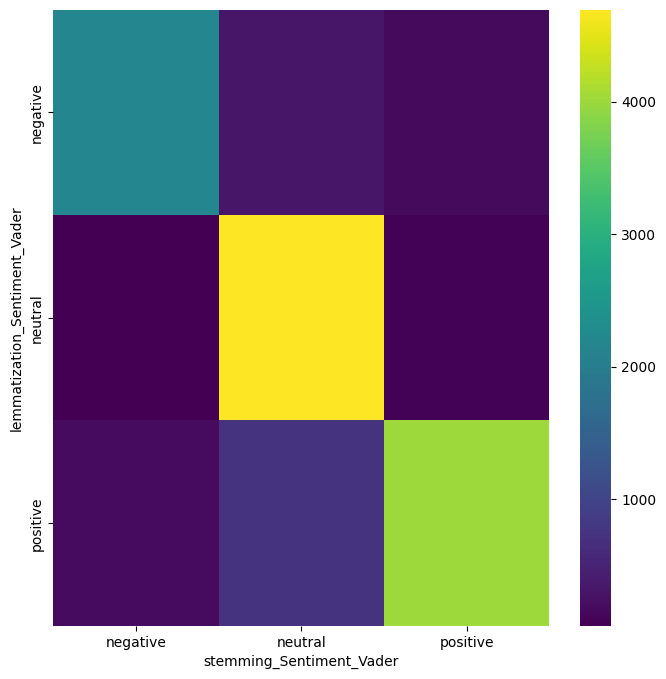

In [ ]:
# @title stemming_Sentiment_Vader vs lemmatization_Sentiment_Vader

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['lemmatization_Sentiment_Vader'].value_counts()
    for x_label, grp in df.groupby('stemming_Sentiment_Vader')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('stemming_Sentiment_Vader')
_ = plt.ylabel('lemmatization_Sentiment_Vader')

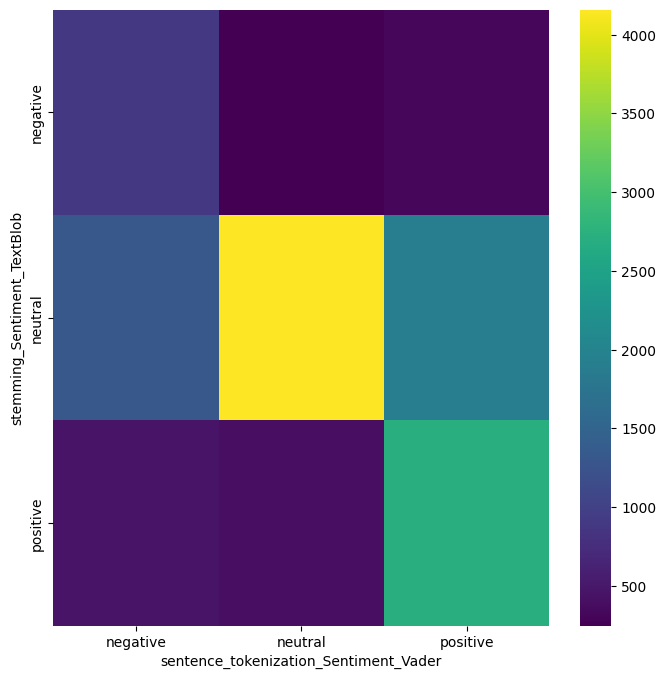

In [ ]:
# @title sentence_tokenization_Sentiment_Vader vs stemming_Sentiment_TextBlob

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['stemming_Sentiment_TextBlob'].value_counts()
    for x_label, grp in df.groupby('sentence_tokenization_Sentiment_Vader')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('sentence_tokenization_Sentiment_Vader')
_ = plt.ylabel('stemming_Sentiment_TextBlob')

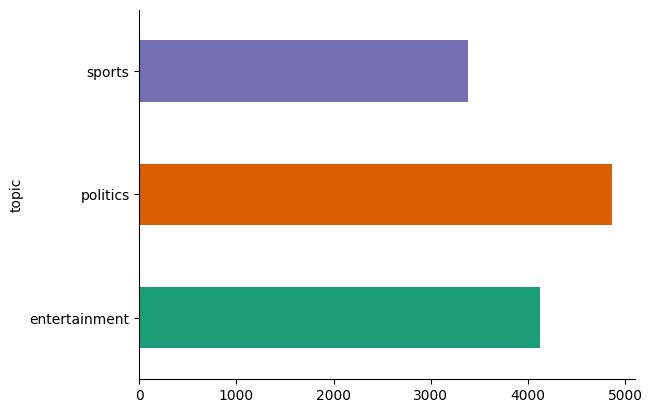

In [ ]:
# @title topic

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('topic').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Prepare the data by splitting it into training and testing sets
def prepare_data(df, text_column, label_column):
    X = df[text_column].fillna('')  # Fill NaNs with empty string
    y = df[label_column]
    return train_test_split(X, y, test_size=0.2, random_state=42)

# Train a separate model for each preprocessing method and classifier
def train_model(X_train, X_test, y_train, y_test, classifier):
    # Vectorize the text data using TF-IDF
    tfidf = TfidfVectorizer(max_features=5000)
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    # Train the classifier
    classifier.fit(X_train_tfidf, y_train)
    y_pred = classifier.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, report, cm



In [ ]:
methods = [
    ('processed_with_stemming', 'stemming_Sentiment_Vader'),
    ('processed_with_lemmatization', 'lemmatization_Sentiment_Vader'),
    ('processed_with_sentence_tokenization', 'sentence_tokenization_Sentiment_Vader'),
    ('processed_with_stemming', 'stemming_Sentiment_TextBlob'),
    ('processed_with_lemmatization', 'lemmatization_Sentiment_TextBlob'),
    ('processed_with_sentence_tokenization', 'sentence_tokenization_Sentiment_TextBlob')
]

# Define the classifiers to use
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Multinomial NB': MultinomialNB()
}

# Function to process and evaluate models for a given dataset
def process_and_evaluate(df, methods, classifiers):
    results = {}
    accuracies = {method_name: {} for method_name, _ in methods}

    for method_name, sentiment_column in methods:
        X_train, X_test, y_train, y_test = prepare_data(df, method_name, sentiment_column)
        for clf_name, clf in classifiers.items():
            accuracy, report, cm = train_model(X_train, X_test, y_train, y_test, clf)
            results[f'{method_name}_{clf_name}'] = {
                'accuracy': accuracy,
                'classification_report': report,
                'confusion_matrix': cm
            }
            accuracies[method_name][clf_name] = accuracy

    return results, accuracies



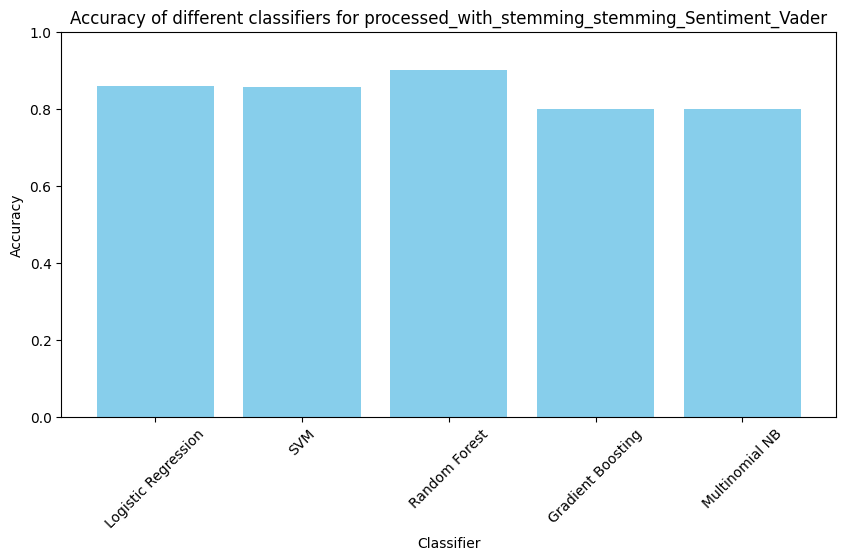

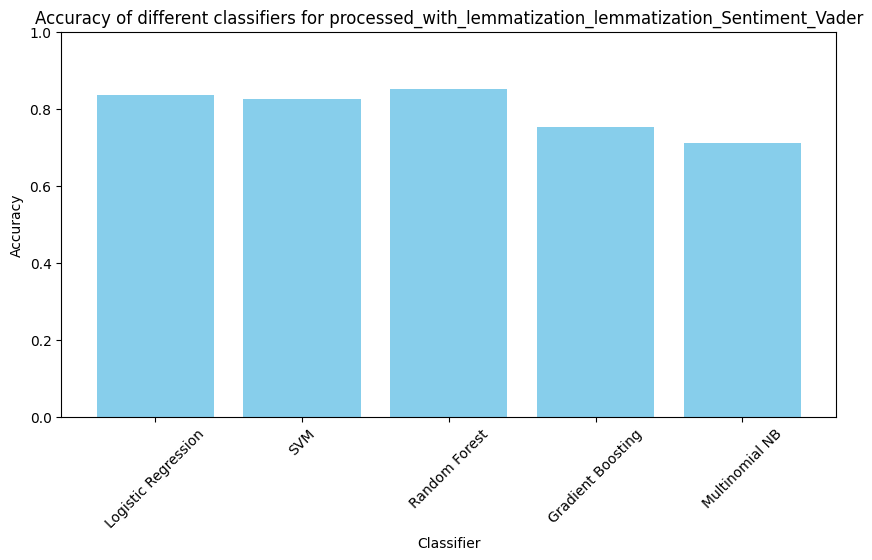

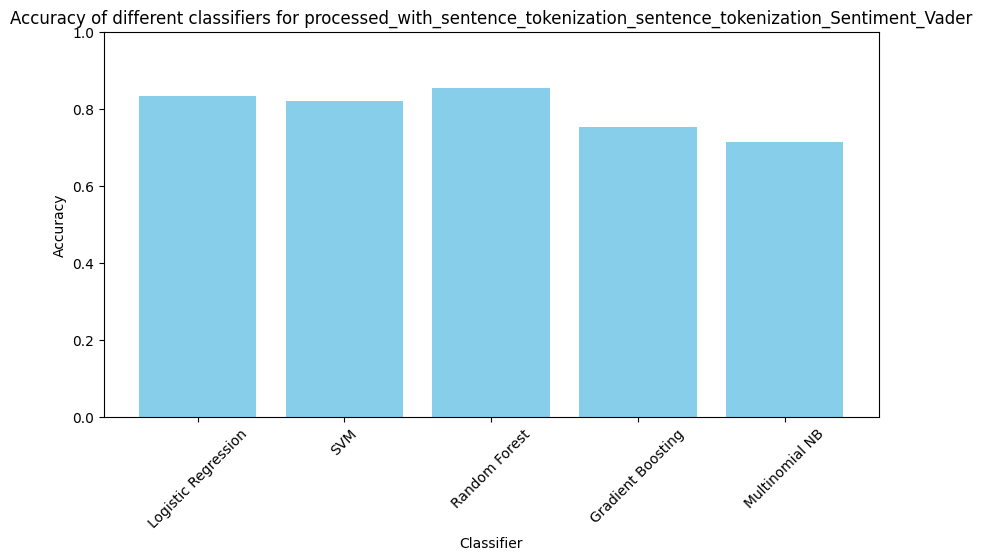

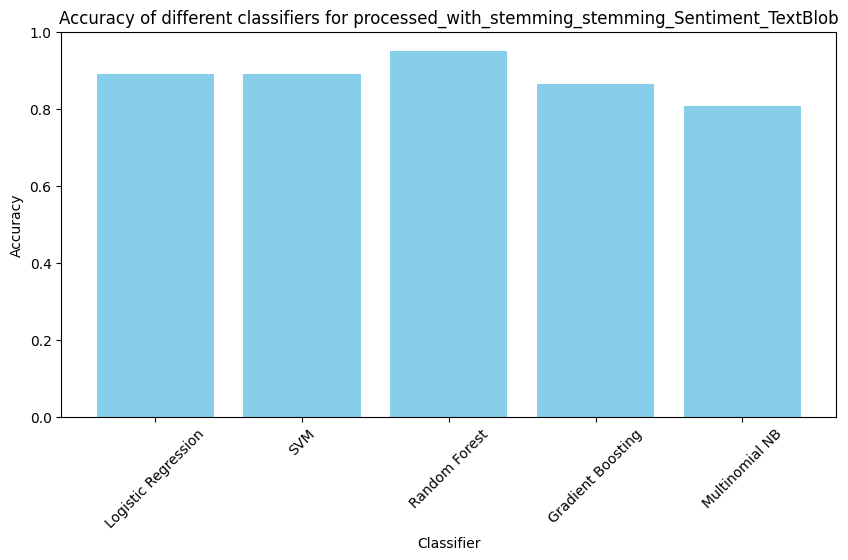

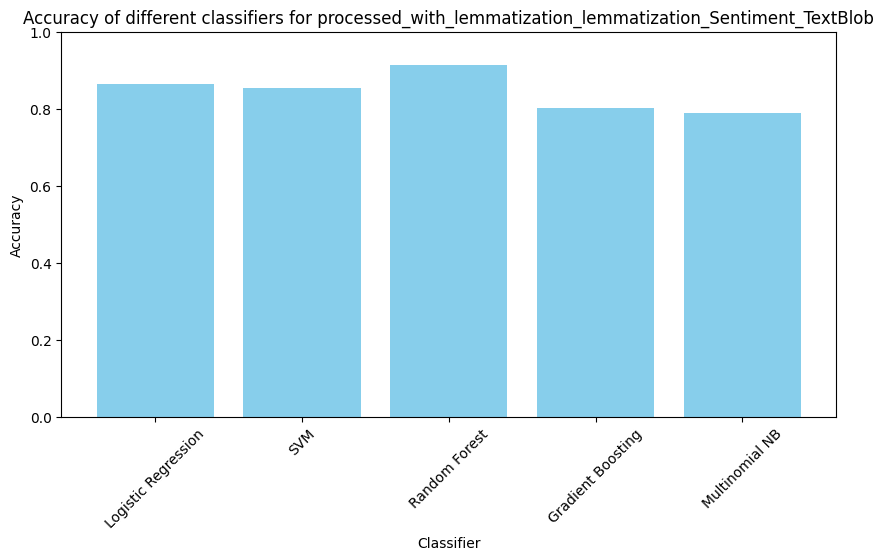

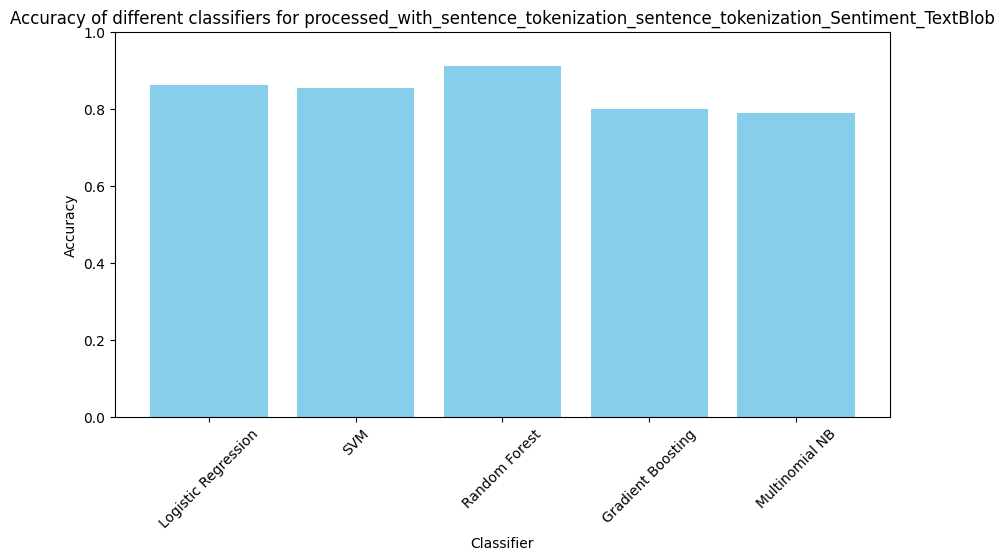

Method: processed_with_stemming_stemming_Sentiment_Vader_Logistic Regression
Accuracy: 0.858989898989899
Classification Report:               precision    recall  f1-score   support

    negative       0.88      0.64      0.74       487
     neutral       0.82      0.99      0.90      1107
    positive       0.91      0.81      0.86       881

    accuracy                           0.86      2475
   macro avg       0.87      0.82      0.83      2475
weighted avg       0.87      0.86      0.85      2475

Confusion Matrix: 
[[ 312  106   69]
 [   4 1097    6]
 [  37  127  717]]


Method: processed_with_stemming_stemming_Sentiment_Vader_SVM
Accuracy: 0.8553535353535353
Classification Report:               precision    recall  f1-score   support

    negative       0.88      0.63      0.73       487
     neutral       0.82      0.99      0.90      1107
    positive       0.91      0.81      0.86       881

    accuracy                           0.86      2475
   macro avg       0.87      0

In [ ]:
# Step 3: Evaluate the performance of each model and collect accuracies
results = {}
accuracies = {}

for text_col, label_col in methods:
    method_name = f'{text_col}_{label_col}'
    accuracies[method_name] = {}
    X_train, X_test, y_train, y_test = prepare_data(df, text_col, label_col)
    for clf_name, clf in classifiers.items():
        accuracy, report, cm = train_model(X_train, X_test, y_train, y_test, clf)
        results[f'{method_name}_{clf_name}'] = {
            'accuracy': accuracy,
            'report': report,
            'confusion_matrix': cm
        }
        accuracies[method_name][clf_name] = accuracy

# Step 4: Plot the results
def plot_accuracies(accuracies):
    for method, scores in accuracies.items():
        plt.figure(figsize=(10, 5))
        plt.bar(scores.keys(), scores.values(), color='skyblue')
        plt.xlabel('Classifier')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)
        plt.title(f'Accuracy of different classifiers for {method}')
        plt.xticks(rotation=45)
        plt.show()

# Call the plot function
plot_accuracies(accuracies)

# Print detailed results
for method, metrics in results.items():
    print(f"Method: {method}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Classification Report: {metrics['report']}")
    print(f"Confusion Matrix: \n{metrics['confusion_matrix']}")
    print("\n")

In [ ]:
# Separate the dataset into three topics
df_entertainment = df[df['topic'] == 'entertainment']
df_politics = df[df['topic'] == 'politics']
df_sports = df[df['topic'] == 'sports']

In [ ]:
# Evaluate models on each dataset
results_entertainment, accuracies_entertainment = process_and_evaluate(df_entertainment, methods, classifiers)
results_politics, accuracies_politics = process_and_evaluate(df_politics, methods, classifiers)
results_sports, accuracies_sports = process_and_evaluate(df_sports, methods, classifiers)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

<Figure size 1200x800 with 0 Axes>

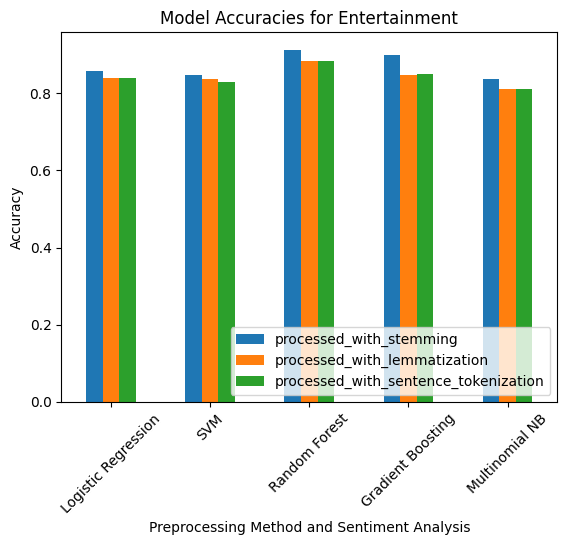

<Figure size 1200x800 with 0 Axes>

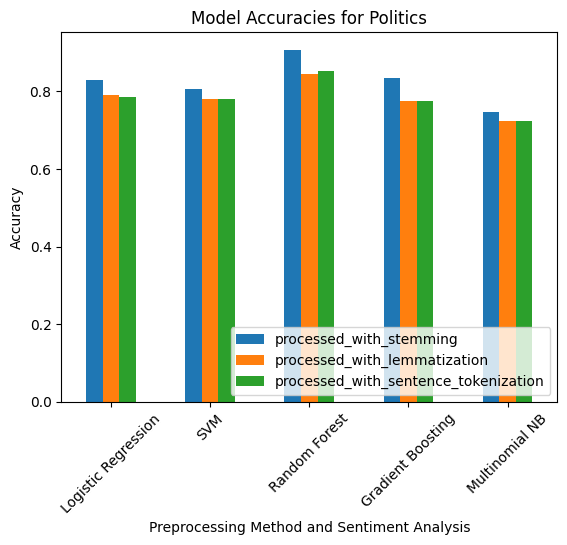

<Figure size 1200x800 with 0 Axes>

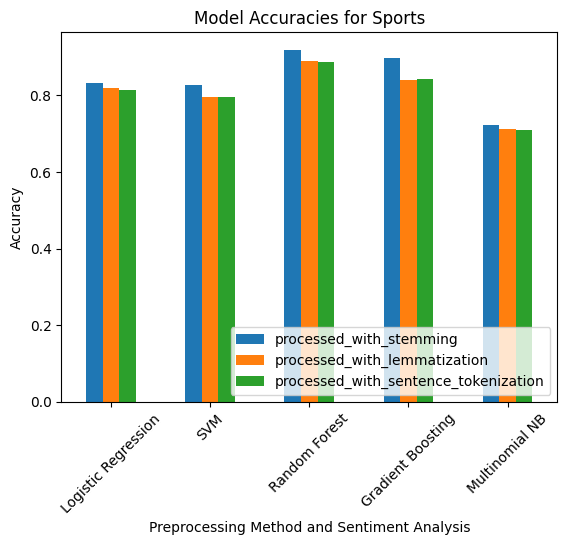

In [ ]:
# Plot the accuracy of each model for each topic
def plot_accuracies(accuracies, title):
    accuracy_df = pd.DataFrame(accuracies)
    plt.figure(figsize=(12, 8))
    accuracy_df.plot(kind='bar')
    plt.title(f'Model Accuracies for {title}')
    plt.ylabel('Accuracy')
    plt.xlabel('Preprocessing Method and Sentiment Analysis')
    plt.xticks(rotation=45)
    plt.legend(loc='lower right')
    plt.show()

plot_accuracies(accuracies_entertainment, 'Entertainment')
plot_accuracies(accuracies_politics, 'Politics')
plot_accuracies(accuracies_sports, 'Sports')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

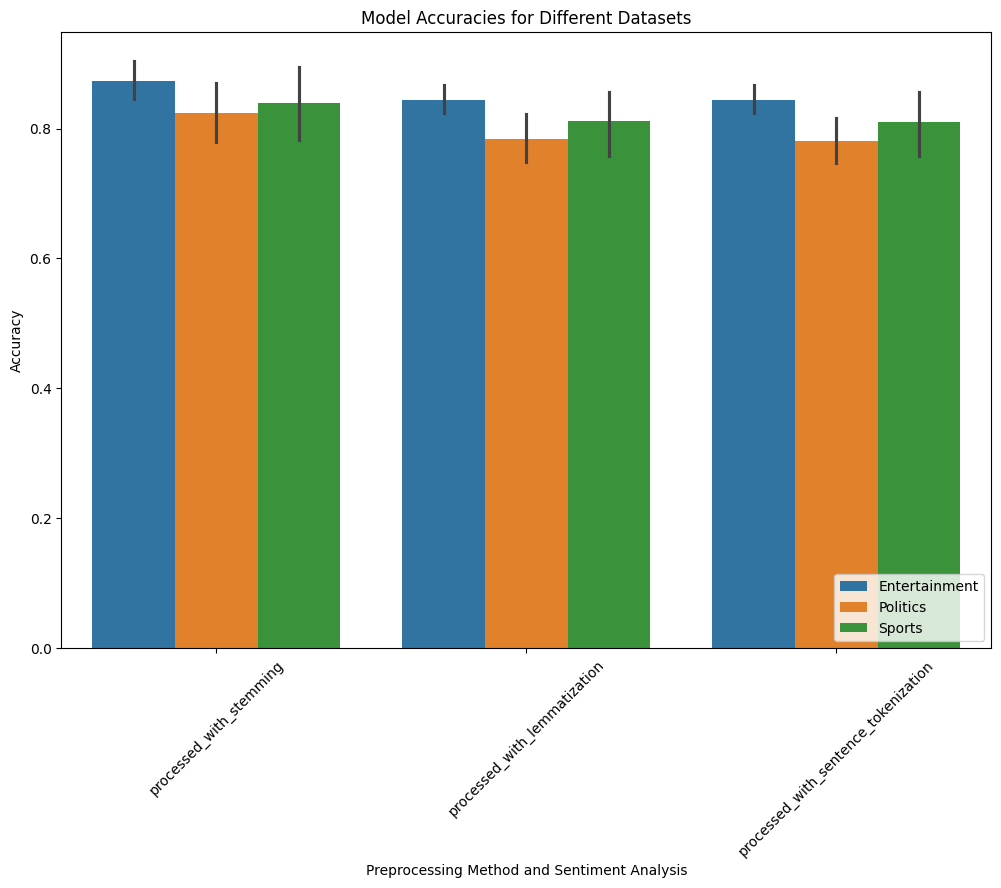

In [ ]:
# Evaluate models on each dataset
results_entertainment, accuracies_entertainment = process_and_evaluate(df_entertainment, methods, classifiers)
results_politics, accuracies_politics = process_and_evaluate(df_politics, methods, classifiers)
results_sports, accuracies_sports = process_and_evaluate(df_sports, methods, classifiers)

# Convert dictionaries to DataFrames and add a dataset type column
df_accuracies_entertainment = pd.DataFrame(accuracies_entertainment).T
df_accuracies_entertainment['Dataset'] = 'Entertainment'

df_accuracies_politics = pd.DataFrame(accuracies_politics).T
df_accuracies_politics['Dataset'] = 'Politics'

df_accuracies_sports = pd.DataFrame(accuracies_sports).T
df_accuracies_sports['Dataset'] = 'Sports'

# Combine all DataFrames
df_accuracies_combined = pd.concat([df_accuracies_entertainment, df_accuracies_politics, df_accuracies_sports])
df_accuracies_combined = df_accuracies_combined.reset_index().rename(columns={'index': 'Method'})

# Plot combined accuracies
import seaborn as sns

def plot_combined_accuracies(df_combined):
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Method', y='value', hue='Dataset', data=pd.melt(df_combined, id_vars=['Method', 'Dataset']))
    plt.title('Model Accuracies for Different Datasets')
    plt.ylabel('Accuracy')
    plt.xlabel('Preprocessing Method and Sentiment Analysis')
    plt.xticks(rotation=45)
    plt.legend(loc='lower right')
    plt.show()

plot_combined_accuracies(df_accuracies_combined)


In [ ]:
# Deep Learning Models

# Ensure TensorFlow version is compatible with Transformers
print(tf.__version__)  # Should be 2.x

# Prepare the data by splitting it into training and testing sets for deep learning
def prepare_data_dl(df, text_column, label_column, max_len=100):
    X = df[text_column].fillna('').tolist()  # Fill NaNs with empty string and convert to list
    y = df[label_column].tolist()

    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X)
    X = tokenizer.texts_to_sequences(X)
    X = pad_sequences(X, maxlen=max_len)

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    y = np.array(y)

    return train_test_split(X, y, test_size=0.2, random_state=42), tokenizer, label_encoder

# LSTM Model
def create_lstm_model(vocab_size, embedding_dim, max_len):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3, activation='softmax'))  # Assuming 3 classes: positive, negative, neutral
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train LSTM Model
def train_lstm_model(X_train, X_test, y_train, y_test, tokenizer, label_encoder, max_len=100, embedding_dim=100, epochs=5, batch_size=64):
    vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
    model = create_lstm_model(vocab_size, embedding_dim, max_len)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2)
    return model, history

# BERT Tokenization and Data Preparation
def prepare_data_bert(df, text_column, label_column, max_len=100):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    X = df[text_column].fillna('').tolist()  # Fill NaNs with empty string and convert to list
    y = df[label_column].tolist()

    input_ids = []
    attention_masks = []

    for text in X:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='tf'
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    input_ids = np.array(input_ids)
    attention_masks = np.array(attention_masks)

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    y = np.array(y)

    return train_test_split(input_ids, attention_masks, y, test_size=0.2, random_state=42), tokenizer, label_encoder

# Create BERT model
def create_bert_model():
    model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
    optimizer = Adam(learning_rate=2e-5, epsilon=1e-8)
    model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])
    return model

# Function to train and evaluate DL models
def train_and_evaluate_dl(df, text_column, sentiment_column):
    # LSTM
    (X_train, X_test, y_train, y_test), tokenizer, label_encoder = prepare_data_dl(df, text_column, sentiment_column)
    model, history = train_lstm_model(X_train, X_test, y_train, y_test, tokenizer, label_encoder)
    lstm_accuracy = model.evaluate(X_test, y_test, verbose=2)[1]
    lstm_results = {
        'accuracy': lstm_accuracy,
        'history': history.history,
        'model': model
    }

    # BERT
    (X_train_ids, X_test_ids, y_train, y_test), tokenizer, label_encoder = prepare_data_bert(df, text_column, sentiment_column)
    X_train_masks, X_test_masks = X_train_ids[:, 1], X_test_ids[:, 1]
    X_train_ids, X_test_ids = X_train_ids[:, 0], X_test_ids[:, 0]

    bert_model = create_bert_model()
    history = bert_model.fit(
        [X_train_ids, X_train_masks],
        y_train,
        epochs=3,
        batch_size=16,
        validation_data=([X_test_ids, X_test_masks], y_test),
        verbose=2
    )
    bert_accuracy = bert_model.evaluate([X_test_ids, X_test_masks], y_test, verbose=2)[1]
    bert_results = {
        'accuracy': bert_accuracy,
        'history': history.history,
        'model': bert_model
    }

    return lstm_results, bert_results


2.15.0


In [ ]:
import numpy as np
# Evaluate DL models for each topic
lstm_entertainment, bert_entertainment = train_and_evaluate_dl(df_entertainment, 'processed_with_lemmatization', 'lemmatization_Sentiment_Vader')
lstm_politics, bert_politics = train_and_evaluate_dl(df_politics, 'processed_with_lemmatization', 'lemmatization_Sentiment_Vader')
lstm_sports, bert_sports = train_and_evaluate_dl(df_sports, 'processed_with_lemmatization', 'lemmatization_Sentiment_Vader')

# Plotting the accuracy of deep learning models
def plot_dl_accuracies(lstm_results, bert_results, title):
    plt.plot(lstm_results['history']['accuracy'], label='LSTM Train')
    plt.plot(lstm_results['history']['val_accuracy'], label='LSTM Test')
    plt.plot(bert_results['history']['accuracy'], label='BERT Train')
    plt.plot(bert_results['history']['val_accuracy'], label='BERT Test')
    plt.title(f'Deep Learning Model Accuracy for {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_dl_accuracies(lstm_entertainment, bert_entertainment, 'Entertainment')
plot_dl_accuracies(lstm_politics, bert_politics, 'Politics')
plot_dl_accuracies(lstm_sports, bert_sports, 'Sports')

print(f'LSTM Entertainment Accuracy: {lstm_entertainment["accuracy"]}')
print(f'BERT Entertainment Accuracy: {bert_entertainment["accuracy"]}')
print(f'LSTM Politics Accuracy: {lstm_politics["accuracy"]}')
print(f'BERT Politics Accuracy: {bert_politics["accuracy"]}')
print(f'LSTM Sports Accuracy: {lstm_sports["accuracy"]}')
print(f'BERT Sports Accuracy: {bert_sports["accuracy"]}')

Epoch 1/5
52/52 - 38s - loss: 0.9197 - accuracy: 0.5536 - val_loss: 0.8068 - val_accuracy: 0.6646 - 38s/epoch - 737ms/step
Epoch 2/5
52/52 - 15s - loss: 0.6687 - accuracy: 0.7321 - val_loss: 0.6455 - val_accuracy: 0.7433 - 15s/epoch - 280ms/step
Epoch 3/5
52/52 - 15s - loss: 0.4137 - accuracy: 0.8476 - val_loss: 0.5276 - val_accuracy: 0.8160 - 15s/epoch - 279ms/step
Epoch 4/5
52/52 - 14s - loss: 0.2467 - accuracy: 0.9170 - val_loss: 0.4774 - val_accuracy: 0.8523 - 14s/epoch - 276ms/step
Epoch 5/5
52/52 - 24s - loss: 0.1391 - accuracy: 0.9552 - val_loss: 0.4560 - val_accuracy: 0.8462 - 24s/epoch - 458ms/step
26/26 - 1s - loss: 0.4560 - accuracy: 0.8462 - 686ms/epoch - 26ms/step


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2699: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


ValueError: too many values to unpack (expected 4)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

def prepare_data_lstm(df, text_column, sentiment_column, max_sequence_length=100, max_num_words=20000):
    # Extract texts and labels
    texts = df[text_column].values
    labels = df[sentiment_column].values

    # Tokenize texts
    tokenizer = Tokenizer(num_words=max_num_words)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    word_index = tokenizer.word_index

    # Pad sequences
    data = pad_sequences(sequences, maxlen=max_sequence_length)

    # Encode labels
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

    return (X_train, X_test, y_train, y_test), tokenizer, label_encoder


In [ ]:
from transformers import BertTokenizer
import numpy as np

def prepare_data_bert(df, text_column, sentiment_column, max_length=100):
    # Extract texts and labels
    texts = df[text_column].values
    labels = df[sentiment_column].values

    # Initialize BERT tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Tokenize texts
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='np'
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = np.array(input_ids)
    attention_masks = np.array(attention_masks)

    # Encode labels
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    # Split data into training and testing sets
    X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test = train_test_split(
        input_ids, attention_masks, labels, test_size=0.2, random_state=42
    )

    return (X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test), tokenizer, label_encoder


In [ ]:
import numpy as np
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def train_lstm_model(X_train, X_test, y_train, y_test, tokenizer, label_encoder):
    # Define your LSTM model architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=X_train.shape[1]),
        tf.keras.layers.LSTM(128, return_sequences=True),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=2)

    results = {
        'history': history.history,
        'accuracy': model.evaluate(X_test, y_test, verbose=0)[1]
    }
    return results


In [ ]:
def train_bert_model(X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test):
    # Define your BERT model architecture
    input_ids = tf.keras.Input(shape=(X_train_ids.shape[1],), dtype='int32')
    attention_masks = tf.keras.Input(shape=(X_train_masks.shape[1],), dtype='int32')
    bert_model = TFBertModel.from_pretrained('bert-base-uncased')

    sequence_output = bert_model(input_ids, attention_mask=attention_masks)[0]
    cls_token = sequence_output[:, 0, :]
    output = tf.keras.layers.Dense(1, activation='sigmoid')(cls_token)

    model = tf.keras.Model(inputs=[input_ids, attention_masks], outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit([X_train_ids, X_train_masks], y_train, epochs=5, batch_size=16, validation_data=([X_test_ids, X_test_masks], y_test), verbose=2)

    results = {
        'history': history.history,
        'accuracy': model.evaluate([X_test_ids, X_test_masks], y_test, verbose=0)[1]
    }
    return results


In [ ]:
def train_and_evaluate_dl(df, text_column, sentiment_column):
    # LSTM
    (X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm), lstm_tokenizer, lstm_label_encoder = prepare_data_lstm(df, text_column, sentiment_column)
    lstm_results = train_lstm_model(X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm, lstm_tokenizer, lstm_label_encoder)

    # BERT
    (X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test), bert_tokenizer, bert_label_encoder = prepare_data_bert(df, text_column, sentiment_column)
    bert_results = train_bert_model(X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test)

    return lstm_results, bert_results


In [ ]:
import matplotlib.pyplot as plt

def plot_dl_accuracies(lstm_results, bert_results, title):
    plt.plot(lstm_results['history']['accuracy'], label='LSTM Train')
    plt.plot(lstm_results['history']['val_accuracy'], label='LSTM Test')
    plt.plot(bert_results['history']['accuracy'], label='BERT Train')
    plt.plot(bert_results['history']['val_accuracy'], label='BERT Test')
    plt.title(f'Deep Learning Model Accuracy for {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [ ]:
# Assuming df_entertainment, df_politics, and df_sports are your dataframes

# Evaluate DL models for each topic
lstm_entertainment, bert_entertainment = train_and_evaluate_dl(df_entertainment, 'processed_with_lemmatization', 'lemmatization_Sentiment_Vader')
lstm_politics, bert_politics = train_and_evaluate_dl(df_politics, 'processed_with_lemmatization', 'lemmatization_Sentiment_Vader')
lstm_sports, bert_sports = train_and_evaluate_dl(df_sports, 'processed_with_lemmatization', 'lemmatization_Sentiment_Vader')

# Plotting the accuracy of deep learning models
plot_dl_accuracies(lstm_entertainment, bert_entertainment, 'Entertainment')
plot_dl_accuracies(lstm_politics, bert_politics, 'Politics')
plot_dl_accuracies(lstm_sports, bert_sports, 'Sports')

# Print model accuracies
print(f'LSTM Entertainment Accuracy: {lstm_entertainment["accuracy"]}')
print(f'BERT Entertainment Accuracy: {bert_entertainment["accuracy"]}')
print(f'LSTM Politics Accuracy: {lstm_politics["accuracy"]}')
print(f'BERT Politics Accuracy: {bert_politics["accuracy"]}')
print(f'LSTM Sports Accuracy: {lstm_sports["accuracy"]}')
print(f'BERT Sports Accuracy: {bert_sports["accuracy"]}')


Epoch 1/5
104/104 - 30s - loss: -8.0827e+00 - accuracy: 0.4524 - val_loss: -2.0036e+01 - val_accuracy: 0.4237 - 30s/epoch - 288ms/step
Epoch 2/5
104/104 - 25s - loss: -3.4161e+01 - accuracy: 0.4530 - val_loss: -5.8196e+01 - val_accuracy: 0.4237 - 25s/epoch - 238ms/step
Epoch 3/5
104/104 - 23s - loss: -7.9579e+01 - accuracy: 0.4530 - val_loss: -1.1804e+02 - val_accuracy: 0.4237 - 23s/epoch - 224ms/step
Epoch 4/5
104/104 - 25s - loss: -1.4466e+02 - accuracy: 0.4530 - val_loss: -1.9978e+02 - val_accuracy: 0.4237 - 25s/epoch - 243ms/step
Epoch 5/5
104/104 - 28s - loss: -2.3177e+02 - accuracy: 0.4530 - val_loss: -3.0434e+02 - val_accuracy: 0.4237 - 28s/epoch - 269ms/step


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

TypeError: Exception encountered when calling layer 'embeddings' (type TFBertEmbeddings).

Could not build a TypeSpec for name: "tf.debugging.assert_less/assert_less/Assert/Assert"
op: "Assert"
input: "tf.debugging.assert_less/assert_less/All"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_0"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_1"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_2"
input: "Placeholder"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_4"
input: "tf.debugging.assert_less/assert_less/y"
attr {
  key: "T"
  value {
    list {
      type: DT_STRING
      type: DT_STRING
      type: DT_STRING
      type: DT_INT32
      type: DT_STRING
      type: DT_INT32
    }
  }
}
attr {
  key: "summarize"
  value {
    i: 3
  }
}
 of unsupported type <class 'tensorflow.python.framework.ops.Operation'>.

Call arguments received by layer 'embeddings' (type TFBertEmbeddings):
  • input_ids=<KerasTensor: shape=(None, 1) dtype=int32 (created by layer 'input_3')>
  • position_ids=None
  • token_type_ids=<KerasTensor: shape=(None, 1) dtype=int32 (created by layer 'tf.fill')>
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False

In [ ]:
import numpy as np
import tensorflow as tf
from transformers import TFBertModel, BertTokenizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def prepare_data_lstm(df, text_column, sentiment_column):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(df[text_column])
    sequences = tokenizer.texts_to_sequences(df[text_column])
    X = pad_sequences(sequences, maxlen=100)

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df[sentiment_column])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return (X_train, X_test, y_train, y_test), tokenizer, label_encoder

def split_with_indices(X_ids, X_masks, y):
    indices = np.arange(X_ids.shape[0])
    train_indices, test_indices, y_train, y_test = train_test_split(indices, y, test_size=0.2, random_state=42)

    X_train_ids = X_ids[train_indices]
    X_test_ids = X_ids[test_indices]
    X_train_masks = X_masks[train_indices]
    X_test_masks = X_masks[test_indices]

    return X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test

def prepare_data_bert(df, text_column, sentiment_column):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    inputs = tokenizer(df[text_column].tolist(), return_tensors='np', max_length=100, padding='max_length', truncation=True)
    X_ids = inputs['input_ids']
    X_masks = inputs['attention_mask']

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df[sentiment_column])

    X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test = split_with_indices(X_ids, X_masks, y)

    return (X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test), tokenizer, label_encoder

def train_lstm_model(X_train, X_test, y_train, y_test, tokenizer, label_encoder):
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, input_length=X_train.shape[1]),
        tf.keras.layers.LSTM(128, return_sequences=True),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=2)

    results = {
        'history': history.history,
        'accuracy': model.evaluate(X_test, y_test, verbose=0)[1]
    }
    return results

def train_bert_model(X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test):
    input_ids = tf.keras.Input(shape=(100,), dtype='int32', name='input_ids')
    attention_masks = tf.keras.Input(shape=(100,), dtype='int32', name='attention_mask')
    bert_model = TFBertModel.from_pretrained('bert-base-uncased')

    sequence_output = bert_model(input_ids, attention_mask=attention_masks)[0]
    cls_token = sequence_output[:, 0, :]
    output = tf.keras.layers.Dense(1, activation='sigmoid')(cls_token)

    model = tf.keras.Model(inputs=[input_ids, attention_masks], outputs=output)

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(
        {'input_ids': X_train_ids, 'attention_mask': X_train_masks},
        y_train,
        epochs=5,
        batch_size=16,
        validation_data=({'input_ids': X_test_ids, 'attention_mask': X_test_masks}, y_test),
        verbose=2
    )

    results = {
        'history': history.history,
        'accuracy': model.evaluate({'input_ids': X_test_ids, 'attention_mask': X_test_masks}, y_test, verbose=0)[1]
    }
    return results

def train_and_evaluate_dl(df, text_column, sentiment_column):
    # LSTM
    (X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm), lstm_tokenizer, lstm_label_encoder = prepare_data_lstm(df, text_column, sentiment_column)
    lstm_results = train_lstm_model(X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm, lstm_tokenizer, lstm_label_encoder)

    # BERT
    (X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test), bert_tokenizer, bert_label_encoder = prepare_data_bert(df, text_column, sentiment_column)
    bert_results = train_bert_model(X_train_ids, X_test_ids, X_train_masks, X_test_masks, y_train, y_test)

    return lstm_results, bert_results

# Example usage
# Assuming df_entertainment, df_politics, df_sports are pre-defined DataFrames
lstm_entertainment, bert_entertainment = train_and_evaluate_dl(df_entertainment, 'processed_with_lemmatization', 'lemmatization_Sentiment_Vader')
lstm_politics, bert_politics = train_and_evaluate_dl(df_politics, 'processed_with_lemmatization', 'lemmatization_Sentiment_Vader')
lstm_sports, bert_sports = train_and_evaluate_dl(df_sports, 'processed_with_lemmatization', 'lemmatization_Sentiment_Vader')

# Plotting the accuracy of deep learning models
def plot_dl_accuracies(lstm_results, bert_results, title):
    plt.plot(lstm_results['history']['accuracy'], label='LSTM Train')
    plt.plot(lstm_results['history']['val_accuracy'], label='LSTM Test')
    plt.plot(bert_results['history']['accuracy'], label='BERT Train')
    plt.plot(bert_results['history']['val_accuracy'], label='BERT Test')
    plt.title(f'Deep Learning Model Accuracy for {title}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_dl_accuracies(lstm_entertainment, bert_entertainment, 'Entertainment')
plot_dl_accuracies(lstm_politics, bert_politics, 'Politics')
plot_dl_accuracies(lstm_sports, bert_sports, 'Sports')

print(f'LSTM Entertainment Accuracy: {lstm_entertainment["accuracy"]}')
print(f'BERT Entertainment Accuracy: {bert_entertainment["accuracy"]}')
print(f'LSTM Politics Accuracy: {lstm_politics["accuracy"]}')
print(f'BERT Politics Accuracy: {bert_politics["accuracy"]}')
print(f'LSTM Sports Accuracy: {lstm_sports["accuracy"]}')
print(f'BERT Sports Accuracy: {bert_sports["accuracy"]}')


Epoch 1/5
104/104 - 43s - loss: -9.3143e+00 - accuracy: 0.4530 - val_loss: -2.2040e+01 - val_accuracy: 0.4237 - 43s/epoch - 412ms/step
Epoch 2/5
104/104 - 31s - loss: -3.7289e+01 - accuracy: 0.4530 - val_loss: -6.2294e+01 - val_accuracy: 0.4237 - 31s/epoch - 298ms/step
Epoch 3/5
104/104 - 29s - loss: -8.4867e+01 - accuracy: 0.4530 - val_loss: -1.2597e+02 - val_accuracy: 0.4237 - 29s/epoch - 277ms/step
Epoch 4/5
104/104 - 29s - loss: -1.5439e+02 - accuracy: 0.4530 - val_loss: -2.1178e+02 - val_accuracy: 0.4237 - 29s/epoch - 276ms/step
Epoch 5/5
104/104 - 29s - loss: -2.4464e+02 - accuracy: 0.4530 - val_loss: -3.2168e+02 - val_accuracy: 0.4237 - 29s/epoch - 276ms/step


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

TypeError: Exception encountered when calling layer 'embeddings' (type TFBertEmbeddings).

Could not build a TypeSpec for name: "tf.debugging.assert_less_6/assert_less/Assert/Assert"
op: "Assert"
input: "tf.debugging.assert_less_6/assert_less/All"
input: "tf.debugging.assert_less_6/assert_less/Assert/Assert/data_0"
input: "tf.debugging.assert_less_6/assert_less/Assert/Assert/data_1"
input: "tf.debugging.assert_less_6/assert_less/Assert/Assert/data_2"
input: "Placeholder"
input: "tf.debugging.assert_less_6/assert_less/Assert/Assert/data_4"
input: "tf.debugging.assert_less_6/assert_less/y"
attr {
  key: "T"
  value {
    list {
      type: DT_STRING
      type: DT_STRING
      type: DT_STRING
      type: DT_INT32
      type: DT_STRING
      type: DT_INT32
    }
  }
}
attr {
  key: "summarize"
  value {
    i: 3
  }
}
 of unsupported type <class 'tensorflow.python.framework.ops.Operation'>.

Call arguments received by layer 'embeddings' (type TFBertEmbeddings):
  • input_ids=<KerasTensor: shape=(None, 100) dtype=int32 (created by layer 'input_ids')>
  • position_ids=None
  • token_type_ids=<KerasTensor: shape=(None, 100) dtype=int32 (created by layer 'tf.fill_6')>
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False

In [ ]:
TypeError: Exception encountered when calling layer 'embeddings' (type TFBertEmbeddings).
